In [33]:
import pandas as pd

head = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","condition"]
df = pd.read_csv('heartdisease.data',names =head)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   sex        303 non-null    float64
 2   cp         303 non-null    float64
 3   trestbps   303 non-null    float64
 4   chol       303 non-null    float64
 5   fbs        303 non-null    float64
 6   restecg    303 non-null    float64
 7   thalach    303 non-null    float64
 8   exang      303 non-null    float64
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    float64
 11  ca         303 non-null    object 
 12  thal       303 non-null    object 
 13  condition  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [63]:
##searching object dtype --> fro column: ca and thal
print(df.ca.unique())
print(df.thal.unique())

data = df[df.ca!='?'] 
data = data[data.thal!='?'] 
data.condition.replace(range(1,4),1, inplace=True) #condition 0 means no disease, while 1 or above is
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)
data

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


#### Defining Model

In [92]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

feature = data.columns.values[:-1]
target = data.columns.values[-1]
X = data[feature].values.astype('float').astype('int')
X.reshape(-1,1)
y = data[target].values

print('Dimension')
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

print('Dimension XyTrainTest')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Dimension
(297, 13)
(297,)
Dimension XyTrainTest
(222, 13)
(222,)
(75, 13)
(75,)


### Modelling

In [93]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

In [94]:
model = Sequential([Dense(units=16, input_dim=13, activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=5, activation='softmax')])
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=len(X_train), epochs=100, shuffle=True, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 16.6598 - accuracy: 0.0450 - val_loss: 11.5224 - val_accuracy: 0.1200
Epoch 2/100
1/1 - 0s - loss: 14.5298 - accuracy: 0.0586 - val_loss: 9.7684 - val_accuracy: 0.1733
Epoch 3/100
1/1 - 0s - loss: 12.5543 - accuracy: 0.0991 - val_loss: 8.3160 - val_accuracy: 0.2400
Epoch 4/100
1/1 - 0s - loss: 10.7993 - accuracy: 0.1577 - val_loss: 7.1395 - val_accuracy: 0.2933
Epoch 5/100
1/1 - 0s - loss: 9.3331 - accuracy: 0.2342 - val_loss: 6.2549 - val_accuracy: 0.3867
Epoch 6/100
1/1 - 0s - loss: 8.2088 - accuracy: 0.3468 - val_loss: 5.6386 - val_accuracy: 0.4667
Epoch 7/100
1/1 - 0s - loss: 7.3808 - accuracy: 0.4009 - val_loss: 5.1685 - val_accuracy: 0.5200
Epoch 8/100
1/1 - 0s - loss: 6.7141 - accuracy: 0.4369 - val_loss: 4.7422 - val_accuracy: 0.5333
Epoch 9/100
1/1 - 0s - loss: 6.0820 - accuracy: 0.4640 - val_loss: 4.3074 - val_accuracy: 0.5600
Epoch 10/100
1/1 - 0s - loss: 5.4323 - accuracy: 0.4730 - val_loss: 3.8465 - val_accuracy: 0.5867
Epoch 11/100
1/1 - 0s - 

Epoch 85/100
1/1 - 0s - loss: 0.9215 - accuracy: 0.6081 - val_loss: 0.9438 - val_accuracy: 0.6533
Epoch 86/100
1/1 - 0s - loss: 0.9166 - accuracy: 0.6081 - val_loss: 0.9424 - val_accuracy: 0.6667
Epoch 87/100
1/1 - 0s - loss: 0.9122 - accuracy: 0.6036 - val_loss: 0.9411 - val_accuracy: 0.6667
Epoch 88/100
1/1 - 0s - loss: 0.9082 - accuracy: 0.6171 - val_loss: 0.9390 - val_accuracy: 0.6667
Epoch 89/100
1/1 - 0s - loss: 0.9046 - accuracy: 0.6126 - val_loss: 0.9359 - val_accuracy: 0.6533
Epoch 90/100
1/1 - 0s - loss: 0.9008 - accuracy: 0.6171 - val_loss: 0.9311 - val_accuracy: 0.6667
Epoch 91/100
1/1 - 0s - loss: 0.8967 - accuracy: 0.6216 - val_loss: 0.9245 - val_accuracy: 0.6667
Epoch 92/100
1/1 - 0s - loss: 0.8923 - accuracy: 0.6261 - val_loss: 0.9167 - val_accuracy: 0.6667
Epoch 93/100
1/1 - 0s - loss: 0.8880 - accuracy: 0.6261 - val_loss: 0.9085 - val_accuracy: 0.6667
Epoch 94/100
1/1 - 0s - loss: 0.8839 - accuracy: 0.6171 - val_loss: 0.9005 - val_accuracy: 0.6667
Epoch 95/100
1/1 - 0

In [97]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: {}, Test Accuracy: {}'.format(train_acc, test_acc))

Train Accuracy: 0.6396396160125732, Test Accuracy: 0.6933333277702332


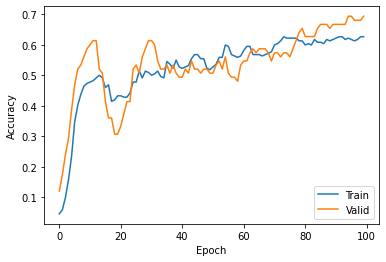

In [106]:
import matplotlib.pyplot as plt
# plot training history

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()
